In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import datetime

plt.rcParams["figure.figsize"] = (20, 5)

In [2]:
data = np.genfromtxt("../로그 데이터/streambench.per.G/streambench.3G.parsed1", delimiter="\n", dtype=np.int64)
data

array([105946021888, 105946021888, 105939730432, ..., 106846345472,
       106846342656, 106846505672], dtype=int64)

In [3]:
delta = np.array([data[i+1] - data[i] for i in range(int(len(data))-1)])
delta, len(delta)

(array([       0, -6291456,        0, ...,    -3968,    -2816,   163016],
       dtype=int64),
 107175)

In [5]:
data_counts = pd.Series(data=delta.T).value_counts()
data_counts

 0            52184
 4096         49896
 2097152       1093
-6291456       1089
 12288          892
              ...  
 375455744        1
-7675904          1
-514024           1
-7540736          1
-151276           1
Length: 214, dtype: int64

In [6]:
def category_by_threshold(data_counts, threshold, sign="over"):
    if sign == "under":
        category = (data_counts < threshold)
    else:
        category = (data_counts > threshold)
    return category.index[category == True]

In [7]:
def tokenizer(data, category, oov=-1):
    data = data.copy()
    mask = np.isin(data, category)
    data[mask == False] = oov
    return data

In [8]:
threshold = 1000    # Synchronize the Categories with 1G1P
category_over_threshold = category_by_threshold(data_counts, threshold)
category_over_threshold

Int64Index([0, 4096, 2097152, -6291456], dtype='int64')

In [9]:
tokenized_data = tokenizer(delta, category_over_threshold.to_numpy(), oov=-1)
tokenized_data

array([       0, -6291456,        0, ...,       -1,       -1,       -1],
      dtype=int64)

In [10]:
tokenized_data_counts = pd.Series(data=tokenized_data.T).value_counts()
tokenized_data_counts

 0          52184
 4096       49896
-1           2913
 2097152     1093
-6291456     1089
dtype: int64

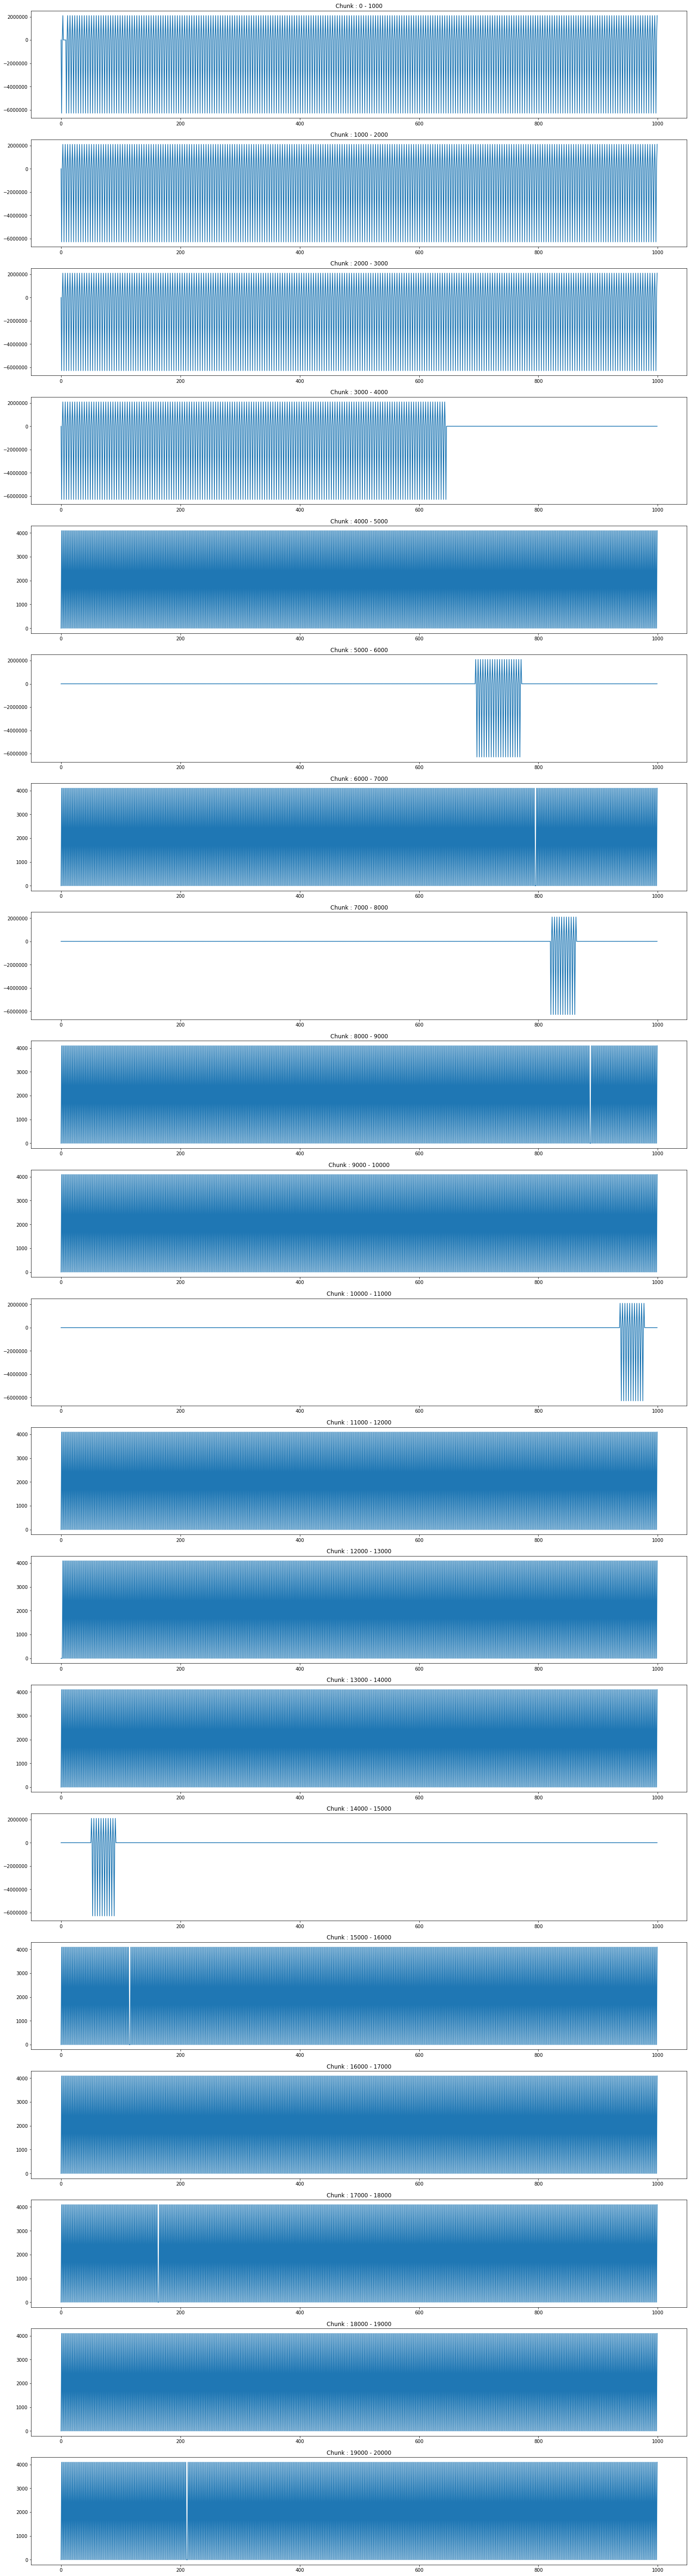

In [11]:
plt.figure(figsize=(25, 100))
num_chunk = 20
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

In [12]:
for i in range(20):
    print("{} - {} : ".format(i*1000, 1000 + i*1000), (tokenized_data[i*1000:1000+i*1000] == -1).sum())

0 - 1000 :  2
1000 - 2000 :  0
2000 - 3000 :  0
3000 - 4000 :  0
4000 - 5000 :  0
5000 - 6000 :  1
6000 - 7000 :  1
7000 - 8000 :  0
8000 - 9000 :  1
9000 - 10000 :  0
10000 - 11000 :  1
11000 - 12000 :  0
12000 - 13000 :  1
13000 - 14000 :  0
14000 - 15000 :  1
15000 - 16000 :  1
16000 - 17000 :  0
17000 - 18000 :  1
18000 - 19000 :  0
19000 - 20000 :  1


In [13]:
for i in range(20):
    print("{} - {} : ".format(i*1000, 1000 + i*1000), pd.Series(tokenized_data[i*1000:1000 + i*1000]).value_counts().index)

0 - 1000 :  Int64Index([0, -6291456, 2097152, -1], dtype='int64')
1000 - 2000 :  Int64Index([0, -6291456, 2097152], dtype='int64')
2000 - 3000 :  Int64Index([0, -6291456, 2097152], dtype='int64')
3000 - 4000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
4000 - 5000 :  Int64Index([4096, 0], dtype='int64')
5000 - 6000 :  Int64Index([0, 4096, 2097152, -6291456, -1], dtype='int64')
6000 - 7000 :  Int64Index([0, 4096, -1], dtype='int64')
7000 - 8000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
8000 - 9000 :  Int64Index([0, 4096, -1], dtype='int64')
9000 - 10000 :  Int64Index([4096, 0], dtype='int64')
10000 - 11000 :  Int64Index([0, 4096, 2097152, -6291456, -1], dtype='int64')
11000 - 12000 :  Int64Index([4096, 0], dtype='int64')
12000 - 13000 :  Int64Index([0, 4096, -1], dtype='int64')
13000 - 14000 :  Int64Index([4096, 0], dtype='int64')
14000 - 15000 :  Int64Index([0, 4096, 2097152, -6291456, -1], dtype='int64')
15000 - 16000 :  Int64Index([0, 4096, -1], dtype='

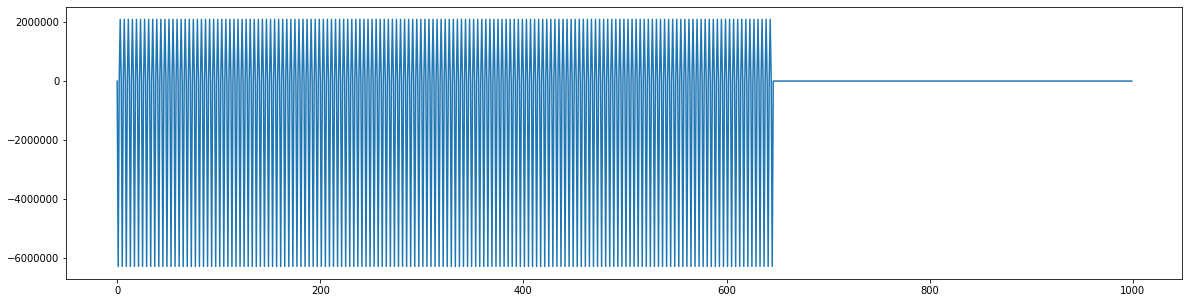

In [20]:
plt.plot(tokenized_data[3000:4000])

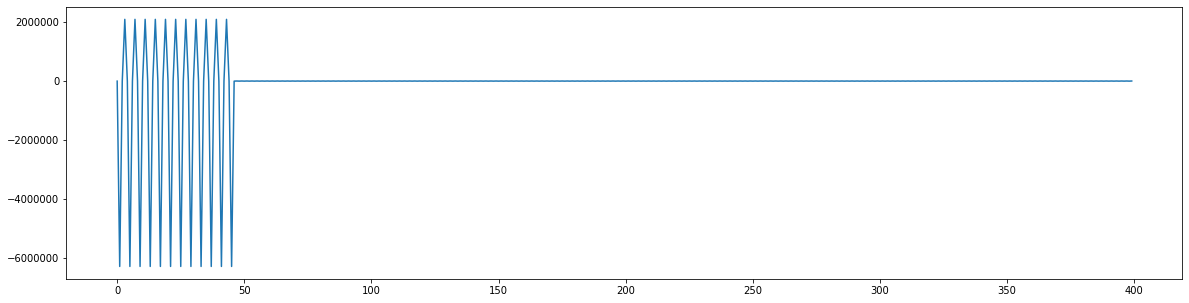

In [27]:
plt.plot(tokenized_data[3600:4000])

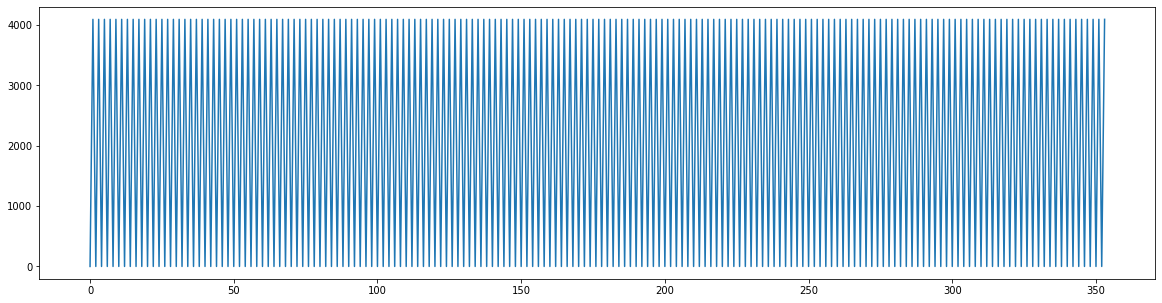

In [26]:
plt.plot(tokenized_data[3646:4000])

In [28]:
initial_stage_index = 3646

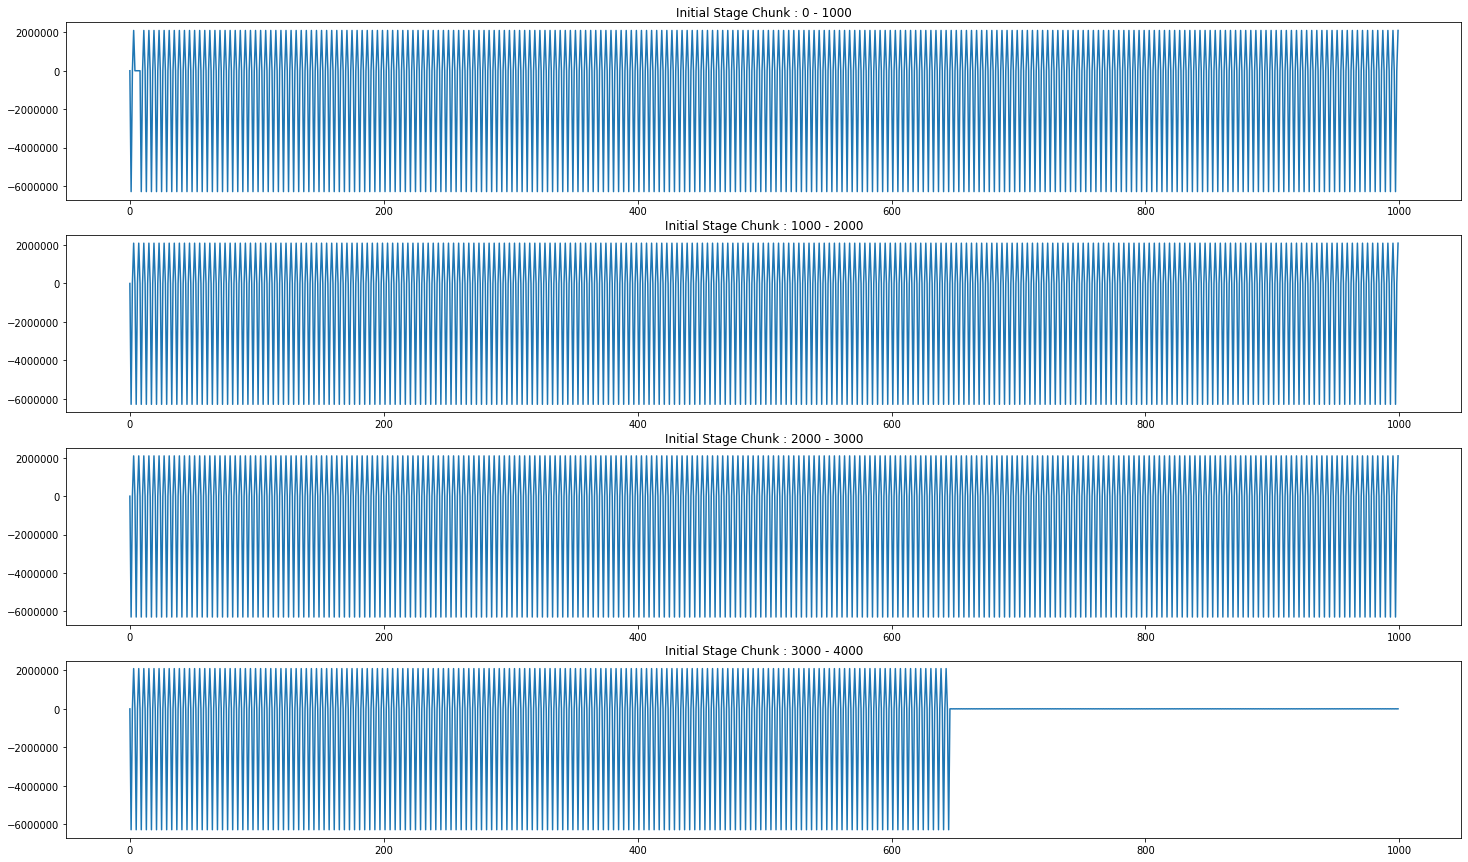

In [29]:
plt.figure(figsize=(25, 15))
num_chunk = initial_stage_index//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Initial Stage Chunk : {} - {}".format(i*1000, (i+1)*1000))
        plot = plt.plot(tokenized_data[i*1000:(i+1)*1000])

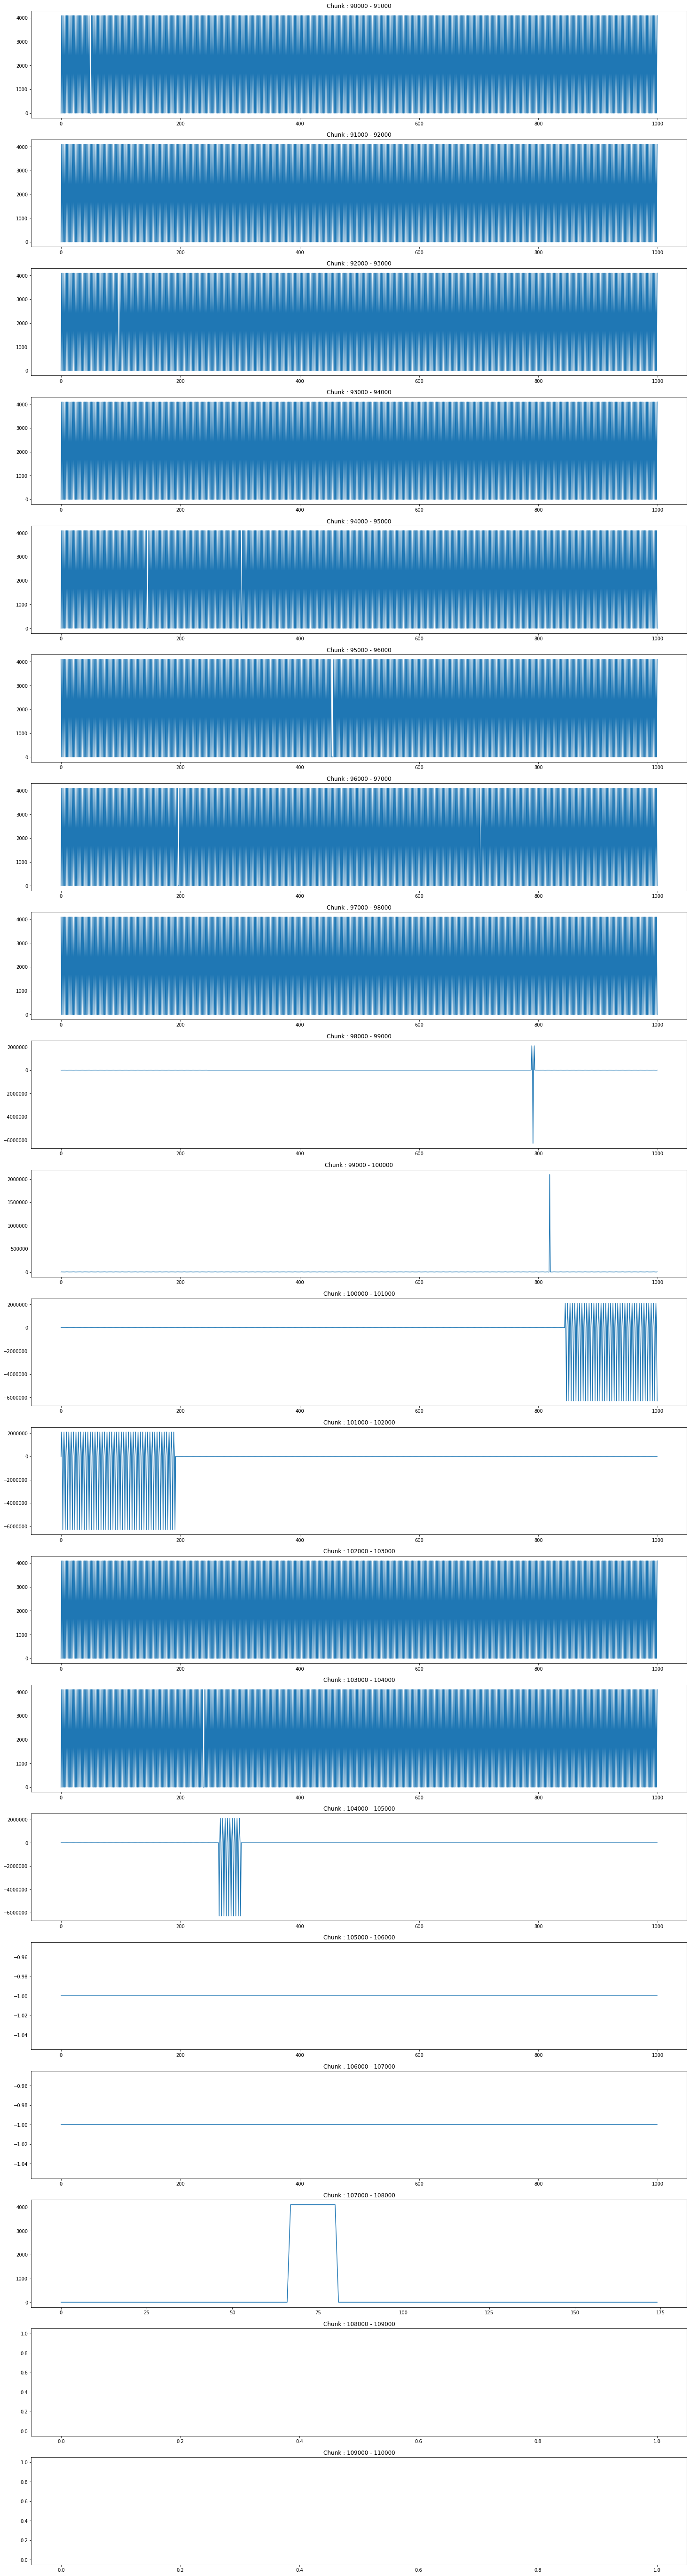

In [30]:
plt.figure(figsize=(25, 100))
num_chunk = 20
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Chunk : {} - {}".format(90000 + i*1000, 90000 + (i+1)*1000))
        plot = plt.plot(tokenized_data[90000 + i*1000:90000 + (i+1)*1000])

In [34]:
for i in range(18):
    print("{} - {} : ".format(90000 + i*1000, 90000 + 1000 + i*1000), (tokenized_data[90000 + i*1000:90000 + 1000+i*1000] == -1).sum())

90000 - 91000 :  1
91000 - 92000 :  0
92000 - 93000 :  1
93000 - 94000 :  0
94000 - 95000 :  1
95000 - 96000 :  0
96000 - 97000 :  1
97000 - 98000 :  0
98000 - 99000 :  3
99000 - 100000 :  1
100000 - 101000 :  1
101000 - 102000 :  0
102000 - 103000 :  0
103000 - 104000 :  1
104000 - 105000 :  697
105000 - 106000 :  1000
106000 - 107000 :  1000
107000 - 108000 :  161


In [35]:
for i in range(18):
    print("{} - {} : ".format(90000 + i*1000, 90000 + 1000 + i*1000), pd.Series(tokenized_data[90000 + i*1000:90000 + 1000 + i*1000]).value_counts().index)

90000 - 91000 :  Int64Index([0, 4096, -1], dtype='int64')
91000 - 92000 :  Int64Index([4096, 0], dtype='int64')
92000 - 93000 :  Int64Index([0, 4096, -1], dtype='int64')
93000 - 94000 :  Int64Index([4096, 0], dtype='int64')
94000 - 95000 :  Int64Index([0, 4096, -1], dtype='int64')
95000 - 96000 :  Int64Index([0, 4096], dtype='int64')
96000 - 97000 :  Int64Index([0, 4096, -1], dtype='int64')
97000 - 98000 :  Int64Index([0, 4096], dtype='int64')
98000 - 99000 :  Int64Index([0, 4096, -1, 2097152, -6291456], dtype='int64')
99000 - 100000 :  Int64Index([0, 4096, -1, 2097152], dtype='int64')
100000 - 101000 :  Int64Index([0, 4096, -6291456, 2097152, -1], dtype='int64')
101000 - 102000 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
102000 - 103000 :  Int64Index([4096, 0], dtype='int64')
103000 - 104000 :  Int64Index([0, 4096, -1], dtype='int64')
104000 - 105000 :  Int64Index([-1, 0, 4096, -6291456, 2097152], dtype='int64')
105000 - 106000 :  Int64Index([-1], dtype='int64')
106000 

In [43]:
for i in range(40):
    print("{} - {} : ".format(104000 + i*100, 104000 + (i+1)*100), pd.Series(tokenized_data[104000 + i*100:104000 + (i+1)*100]).value_counts().index)

104000 - 104100 :  Int64Index([4096, 0], dtype='int64')
104100 - 104200 :  Int64Index([4096, 0], dtype='int64')
104200 - 104300 :  Int64Index([0, 4096, -6291456, 2097152], dtype='int64')
104300 - 104400 :  Int64Index([-1, 0, -6291456], dtype='int64')
104400 - 104500 :  Int64Index([-1], dtype='int64')
104500 - 104600 :  Int64Index([-1], dtype='int64')
104600 - 104700 :  Int64Index([-1], dtype='int64')
104700 - 104800 :  Int64Index([-1], dtype='int64')
104800 - 104900 :  Int64Index([-1], dtype='int64')
104900 - 105000 :  Int64Index([-1], dtype='int64')
105000 - 105100 :  Int64Index([-1], dtype='int64')
105100 - 105200 :  Int64Index([-1], dtype='int64')
105200 - 105300 :  Int64Index([-1], dtype='int64')
105300 - 105400 :  Int64Index([-1], dtype='int64')
105400 - 105500 :  Int64Index([-1], dtype='int64')
105500 - 105600 :  Int64Index([-1], dtype='int64')
105600 - 105700 :  Int64Index([-1], dtype='int64')
105700 - 105800 :  Int64Index([-1], dtype='int64')
105800 - 105900 :  Int64Index([-1],

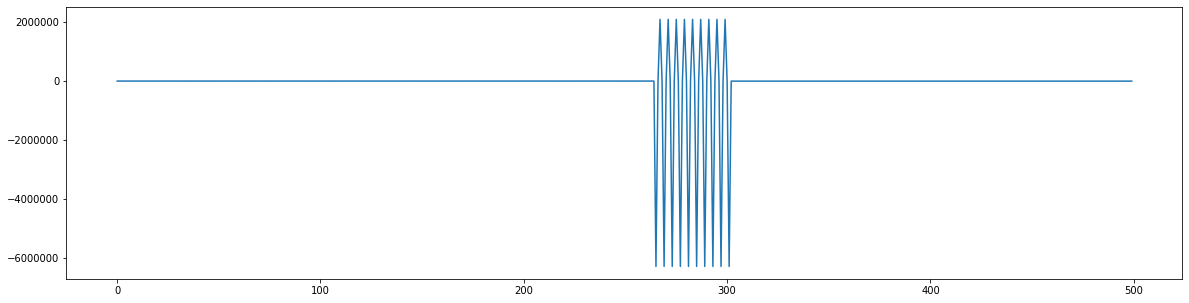

In [40]:
plt.plot(tokenized_data[104000:104500])

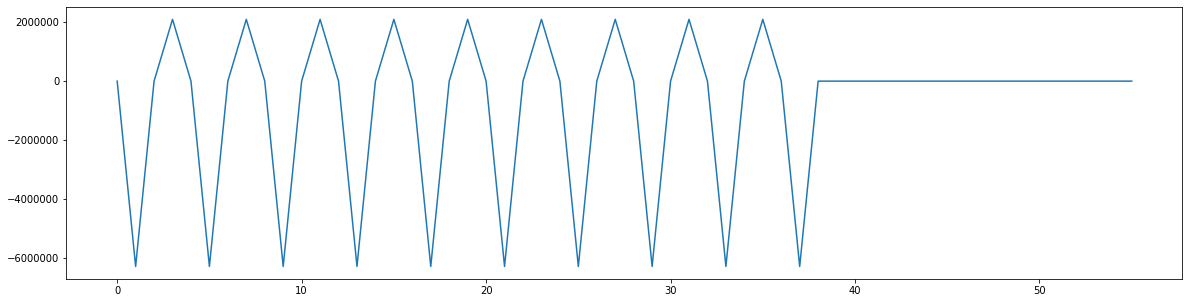

In [48]:
plt.plot(tokenized_data[104264:104320])

In [49]:
terminal_stage_index = 104264

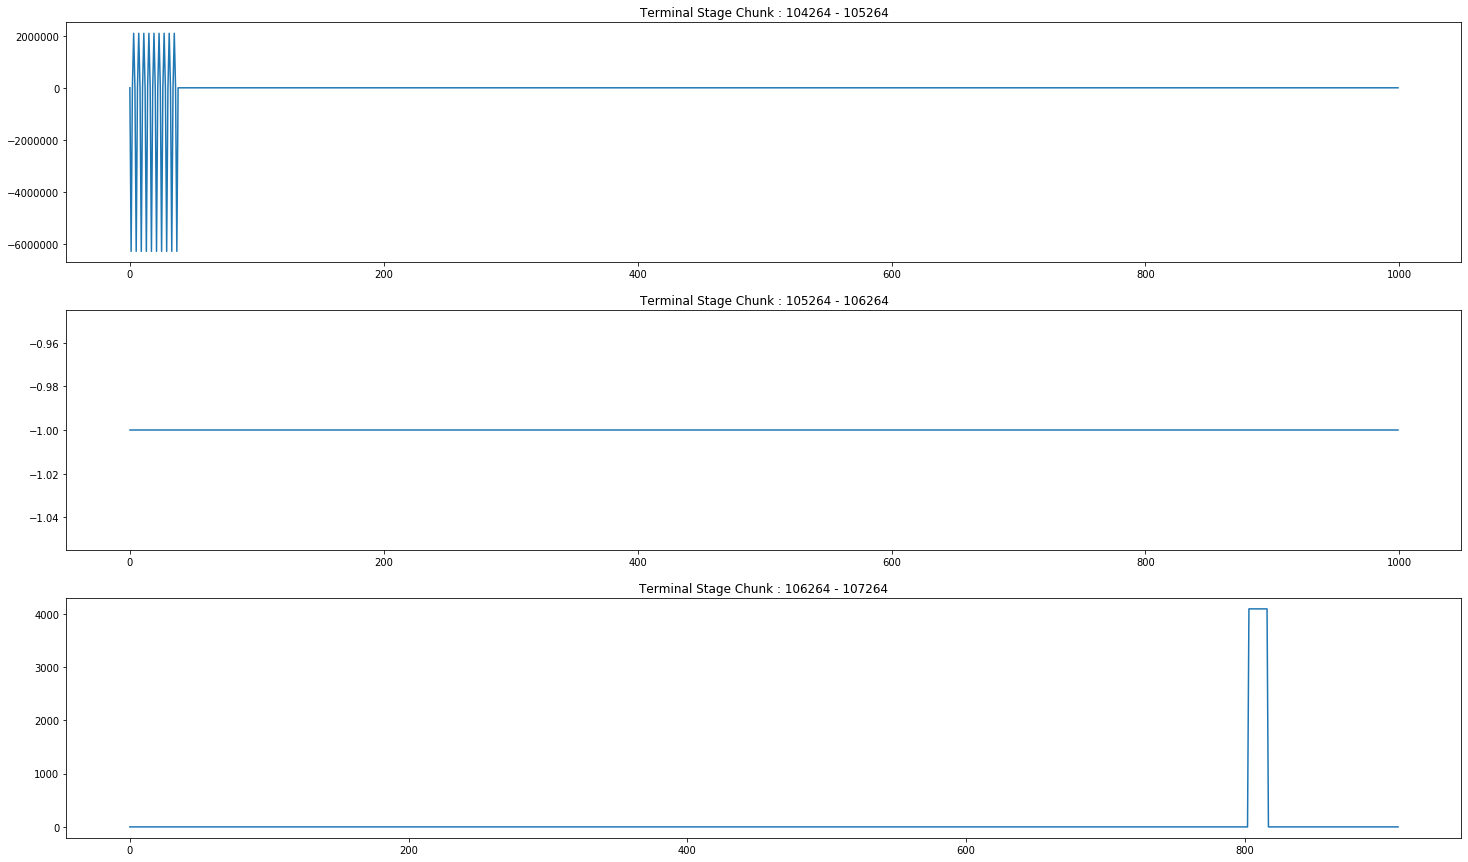

In [50]:
plt.figure(figsize=(25, 15))
num_chunk = (len(delta) - terminal_stage_index)//1000 + 1
for i in range(num_chunk):
        ax = plt.subplot(num_chunk, 1, i+1)
        title = plt.title("Terminal Stage Chunk : {} - {}".format(terminal_stage_index + i*1000, terminal_stage_index + (i+1)*1000))
        plot = plt.plot(tokenized_data[terminal_stage_index + i*1000:terminal_stage_index + (i+1)*1000])

In [51]:
processed_dataset = pd.DataFrame(data=np.c_[data[initial_stage_index:terminal_stage_index], data[initial_stage_index+1:terminal_stage_index+1], delta[initial_stage_index:terminal_stage_index], tokenized_data[initial_stage_index:terminal_stage_index]], columns=["t", "t+1", "delta", "tokenized_data"])
processed_dataset

t           t+1  delta  tokenized_data
0       102118719488  102118719488      0               0
1       102118719488  102118723584   4096            4096
2       102118723584  102118723584      0               0
3       102118723584  102118727680   4096            4096
4       102118727680  102118727680      0               0
...              ...           ...    ...             ...
100613  101177085952  101177090048   4096            4096
100614  101177090048  101177090048      0               0
100615  101177090048  101177094144   4096            4096
100616  101177094144  101177094144      0               0
100617  101177094144  101177098240   4096            4096

[100618 rows x 4 columns]

In [54]:
for i in range(90000, 91000):
    print(processed_dataset["t+1"][i] - processed_dataset["t"][i], processed_dataset["delta"][i])

0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
4096 4096
0 0
40

In [55]:
processed_dataset["tokenized_data"].value_counts()

 0          50341
 4096       49882
 2097152      174
-6291456      168
-1             53
Name: tokenized_data, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(processed_dataset, test_size=0.25, shuffle=False)
train_set, test_set

(                  t           t+1  delta  tokenized_data
 0      102118719488  102118719488      0               0
 1      102118719488  102118723584   4096            4096
 2      102118723584  102118723584      0               0
 3      102118723584  102118727680   4096            4096
 4      102118727680  102118727680      0               0
 ...             ...           ...    ...             ...
 75458  101626540032  101626544128   4096            4096
 75459  101626544128  101626544128      0               0
 75460  101626544128  101626548224   4096            4096
 75461  101626548224  101626548224      0               0
 75462  101626548224  101626552320   4096            4096
 
 [75463 rows x 4 columns],
                    t           t+1  delta  tokenized_data
 75463   101626552320  101626552320      0               0
 75464   101626552320  101626556416   4096            4096
 75465   101626556416  101626556416      0               0
 75466   101626556416  101626560512   4

In [57]:
train_set.to_csv("data/StreamBench_3G1P_train_set.csv", index=False)
test_set.to_csv("data/StreamBench_3G1P_test_set.csv", index=False)